# Diabetes dataset

This dataset is originally from the *National Institute of Diabetes and Digestive and Kidney Diseases*.

<br />The objective of the dataset is to diagnostically **predict whether or not a patient has diabetes**, based on certain diagnostic measurements included in the dataset. 

<br />Several constraints were placed on the selection of these instances from a larger database. 
<br />In particular, all **patients here are females at least 21 years old of Pima Indian heritage**.

# Import 

In [439]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.plotting.backend = "plotly"


# Data preprocessing

In [440]:
df = pd.read_csv('diabetes.csv')

In [441]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1


Check if there is any NaN values : ✅ no NaN

In [442]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Check the types of all columns : ✅ only float / int

In [443]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Check the number of 0 in all columns : ❌ some variables have 0 and is not possible (BMI, Glucose can't be 0 otherwise you would be dead)

In [444]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  111
Count of zeros in column  Glucose  is :  5
Count of zeros in column  BloodPressure  is :  35
Count of zeros in column  SkinThickness  is :  227
Count of zeros in column  Insulin  is :  374
Count of zeros in column  BMI  is :  11
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  500


We can replace those values by the mean of the variable 

In [445]:
df['BMI'].replace(0.0,value=df['BMI'].mean(), inplace=True)
df['Glucose'].replace(0.0,value=df['Glucose'].mean(), inplace=True)

Check if it worked

In [446]:
for column_name in ['BMI','Glucose','SkinThickness','Insulin']:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  BMI  is :  0
Count of zeros in column  Glucose  is :  0
Count of zeros in column  SkinThickness  is :  227
Count of zeros in column  Insulin  is :  374


# Clean other extrem values 🧹

In [447]:
descirbe = df.describe()

def cleanColumn(data,columns, thr = 2):
    column_desc = descirbe[columns]
    
    q3 = column_desc[6]
    q1 = column_desc[4]
    IQR = q3 - q1
    
    top_limit_clm = q3 + thr * IQR
    bottom_limit_clm = q1 - thr * IQR
    
    filter_clm_bottom = bottom_limit_clm < data[columns]
    filter_clm_top = data[columns] < top_limit_clm
    
    filters = filter_clm_bottom & filter_clm_top
    
    data = data[filters]
    
    print("{} of dataset after column {}".format(data.shape, columns))
    
    return data

In [448]:
for i in df.columns:
    df = cleanColumn(df,i)

(767, 9) of dataset after column Pregnancies
(767, 9) of dataset after column Glucose
(730, 9) of dataset after column BloodPressure
(729, 9) of dataset after column SkinThickness
(707, 9) of dataset after column Insulin
(703, 9) of dataset after column BMI
(691, 9) of dataset after column DiabetesPedigreeFunction
(690, 9) of dataset after column Age
(690, 9) of dataset after column Outcome


We can now start our analysis 👍

# Data analysis 🕵️ #
Our target is the variable **Outcome** :
+ 0, the patient doesn't have diabete
+ 1, the patient has diabete

In [449]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00
mean,3.89,120.17,72.46,20.79,70.09,32.20,0.45,33.30,0.33
std,3.33,29.61,11.92,15.36,86.79,6.54,0.28,11.67,0.47
min,0.00,44.00,30.00,0.00,0.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,0.00,0.00,27.40,0.24,24.00,0.00
50%,3.00,115.00,72.00,23.00,39.00,32.00,0.37,29.00,0.00
75%,6.00,138.00,80.00,32.00,125.00,36.30,0.60,41.00,1.00
max,15.00,198.00,114.00,60.00,375.00,53.20,1.39,70.00,1.00


## Pregnancies

In [450]:
fig = px.bar(
            df.groupby(["Pregnancies"]).count().reset_index(), 
            x='Pregnancies', 
            y='Outcome',
            title="Number of pregnancies (for a woman) count", 
            labels={
                "Outcome": "Count",
                "Pregnancies": "Number of pregnancies"
            }
)

fig.show()

We can see that most of our women had between 1 pregnancie

In [451]:
fig = px.box(df,x="Outcome", y="Pregnancies",color="Outcome")
fig.show()

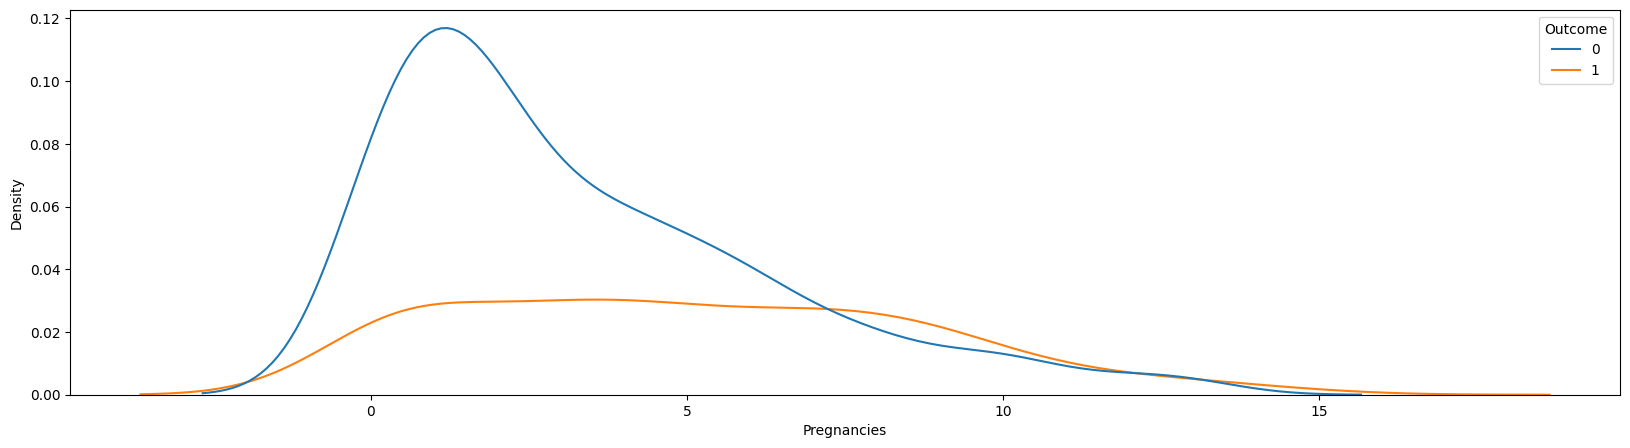

In [452]:
plt.figure(figsize=(20,5))
sns.kdeplot('Pregnancies', hue='Outcome',data=df)
plt.show()

The overall distribution of the variable **Pregnancies** show us that the density between the persons without diabete (Outcome = 0) and the persons with diabetes (Outcome = 1) is very different.

## Glucose 

In [453]:
fig = px.line(
            df.groupby(["Glucose"]).count().reset_index(), 
            x='Glucose', 
            y='Outcome',
            title="Glucose count", 
            labels={
                "Outcome": "Count"            
            }
)

fig.show()

In [454]:
fig = px.box(df,x="Outcome", y="Glucose",color="Outcome")
fig.show()

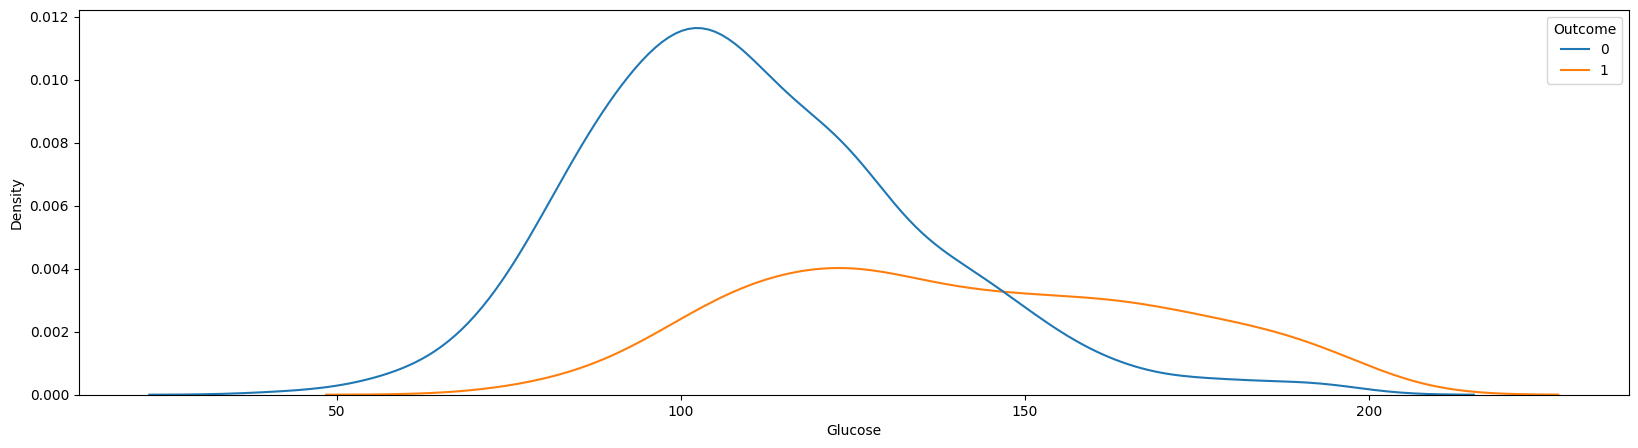

In [455]:
plt.figure(figsize=(20,5))
sns.kdeplot('Glucose', hue='Outcome',data=df)
plt.show()

The overall distribution of the variable **Glucose** show us that the density between the persons without diabete (Outcome = 0) and the persons with diabetes (Outcome = 1) is very different.

## BMI

In [456]:
fig = px.scatter(
            df.groupby(["BMI"]).count().reset_index(), 
            x='BMI', 
            y='Outcome',
            title="BMI count", 
            labels={
                "Outcome": "Count"
            },
            trendline="ewm", trendline_options=dict(halflife=2),
)
fig.update_traces(marker_size=3)

fig.show()

In [457]:
fig = px.box(df,x="Outcome", y="BMI",color="Outcome")
fig.show()

## Age

In [458]:
fig = px.box(df,x="Outcome", y="Age",color="Outcome")
fig.show()

Patients with diabete seems to be more aged than the others

# Target Analysis

In [459]:
fig = px.pie(df, values='Age', names='Outcome')
fig.show()

In [460]:
fig = px.imshow(df.corr(), color_continuous_scale= px.colors.sequential.OrRd)
fig.show()

The Outcome is highly correalated (more then 0.30 cor) 🔝 with  
+ Glucose 
+ BMI

<br />It also looks like that the Outcome is interestingly correalated (between 0.10 and 0.30) with 
+ Pregnancies
+ Age
+ DiabetesPedigreeFunction
+ Insuline
+ Blood Pressure

<br /> Maybe it could be interesting to drop the SkinThickness var as it has a low correlation with Outcome ⭐


# Machine Learning 🤖

In [461]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [462]:
X = df.drop(['SkinThickness','Outcome'], axis = 1)
y = df['Outcome']

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=29)

Metrics used :
+ Confusion Matrix, the count of true negatives is C(0,0), false negatives is C(1,0), true positives is C(1,1) and false positives is C(0,1)
+ Accuracy score, it measures how many observations, both positive and negative, were correctly classified
+ Precision score, the number of true positives divided by the total number of true positives + false positives
+ Recall score, the number of true positives divided by the total number of true positives + false negatives.

In [464]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models.sort_values('Accuracy',ascending =False)

100%|██████████| 29/29 [00:03<00:00,  9.52it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.82,0.76,0.76,0.81,0.02
NuSVC,0.80,0.74,0.74,0.79,0.03
LogisticRegression,0.80,0.73,0.73,0.79,0.01
LinearSVC,0.80,0.73,0.73,0.79,0.02
AdaBoostClassifier,0.80,0.77,0.77,0.80,0.12
RidgeClassifier,0.79,0.72,0.72,0.78,0.01
GaussianNB,0.79,0.77,0.77,0.79,0.01
RandomForestClassifier,0.79,0.74,0.74,0.78,0.15
CalibratedClassifierCV,0.79,0.72,0.72,0.78,0.08


## Logistic Regression

In [465]:
from sklearn.linear_model import LogisticRegression

In [466]:
clf = LogisticRegression(max_iter=500000)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [467]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
print("Model performance :")
print("Confusion Matrix:\n", cm)
print("Accuracy: ", acc)
print("Precision:", pr)
print("Recall:", rc)

Model performance :
Confusion Matrix:
 [[84  8]
 [20 26]]
Accuracy:  0.7971014492753623
Precision: 0.7647058823529411
Recall: 0.5652173913043478


> It's possible to give a threshold in order to determine at what level of probability the patient is Diabete positive (instead of the natural threshold = 0.5)
> <br />Let's consider that in our case, the **threshold** must be set at **0.33**. It means that our model will predict that the patient is diabetic (Outcome = 1) when the model calculates that he has more than 33% of luck to be diabetic

In [468]:
new_pred = y_pred_proba[:,1]>0.33 # threshold for diabete 
new_pred = new_pred * 1

cm = confusion_matrix(y_test, new_pred)
acc = accuracy_score(y_test, new_pred)
pr = precision_score(y_test, new_pred)
rc = recall_score(y_test, new_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy: ", acc)
print("Precision:", pr)
print("Recall: ",rc)

Confusion Matrix:
 [[69 23]
 [ 6 40]]
Accuracy:  0.7898550724637681
Precision: 0.6349206349206349
Recall:  0.8695652173913043


> ✨ We lost in precision and accuracy but we increased the recall score by 8%! So it means we predicted more diabete patients as positive ✨

## SVC

In [469]:
from sklearn.svm import SVC

In [470]:
clf1 = SVC(probability=True)
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
y_pred_proba = clf1.predict_proba(X_test)

In [471]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
print("Model performance :")
print("Confusion Matrix:\n", cm)
print("Accuracy: ", acc)
print("Precision:", pr)
print("Recall:", rc)

Model performance :
Confusion Matrix:
 [[83  9]
 [23 23]]
Accuracy:  0.7681159420289855
Precision: 0.71875
Recall: 0.5


In [472]:
new_pred = y_pred_proba[:,1]>0.33 # threshold for diabete 
new_pred = new_pred * 1

cm = confusion_matrix(y_test, new_pred)
acc = accuracy_score(y_test, new_pred)
pr = precision_score(y_test, new_pred)
rc = recall_score(y_test, new_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy: ", acc)
print("Precision:", pr)
print("Recall: ",rc)

Confusion Matrix:
 [[69 23]
 [13 33]]
Accuracy:  0.7391304347826086
Precision: 0.5892857142857143
Recall:  0.717391304347826


**LogisticRegression performs better then SVC 🏅**

# Deep Learning 🧠

It can be interesting to try what results a Deep Learning model will give us. 

<br /> ⛔But I dont believe in our case it's a good idea because we dont have a lot of data (number of patients). And it's not very easy (almost impossible) to explain to a patient WHY the patient is diagnozed as positive (Deep Learning model are not very comprehensive) ⛔

In [473]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

## Model 1

In [474]:
#creating the structure of the neural network
model1 = Sequential()
#first layer is hidden. Dense means the layers are connected
model1.add(Dense(32, activation='relu',input_dim= 7))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam' , loss='binary_crossentropy' ,metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, batch_size = 10, epochs = 200, callbacks=[EarlyStopping(patience=15)], validation_split = 0.20)

Epoch 1/200
45/45 [==============================] - 1s 4ms/step - loss: 3.0143 - accuracy: 0.5714 - val_loss: 0.7841 - val_accuracy: 0.6126
Epoch 2/200
45/45 [==============================] - 0s 2ms/step - loss: 0.8126 - accuracy: 0.6531 - val_loss: 0.8290 - val_accuracy: 0.6757
Epoch 3/200
45/45 [==============================] - 0s 2ms/step - loss: 0.7275 - accuracy: 0.6621 - val_loss: 1.0012 - val_accuracy: 0.5225
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 0.8259 - accuracy: 0.6553 - val_loss: 0.7291 - val_accuracy: 0.6396
Epoch 5/200
45/45 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.6599 - val_loss: 0.8984 - val_accuracy: 0.6396
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.6961 - val_loss: 0.6072 - val_accuracy: 0.6937
Epoch 7/200
45/45 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.7029 - val_loss: 0.7222 - val_accuracy: 0.7027
Epoch 8/200
4

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


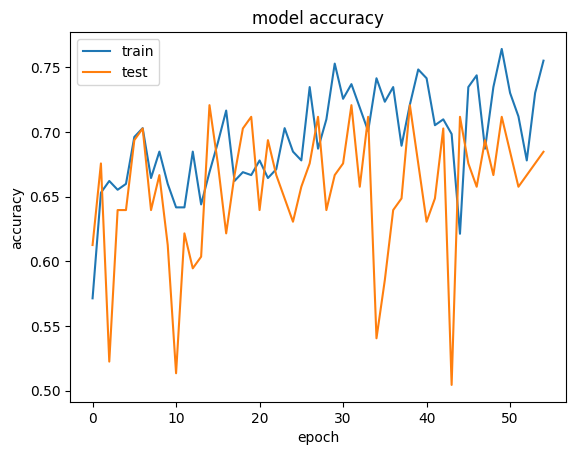

In [475]:
# list all data in history
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

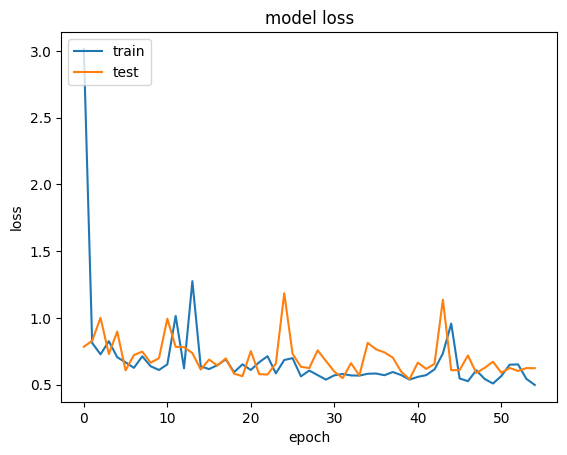

In [476]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [477]:
y_pred = model1.predict(X_test)
y_pred = y_pred>0.33 # threshold for diabete 
y_pred = y_pred * 1

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
print("Model performance :")
print("Confusion Matrix:\n", cm)
print("Accuracy: ", acc)
print("Precision:", pr)
print("Recall:", rc)

5/5 [==============================] - 0s 2ms/step
Model performance :
Confusion Matrix:
 [[67 25]
 [19 27]]
Accuracy:  0.6811594202898551
Precision: 0.5192307692307693
Recall: 0.5869565217391305


## Model 2 with scaled data

In [478]:
from sklearn.preprocessing import MinMaxScaler

In [479]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [480]:
#creating the structure of the neural network
model2 = Sequential()
#first layer is hidden. Dense means the layers are connected
model2.add(Dense(32, activation='relu',input_dim= 7))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam' , loss='binary_crossentropy' ,metrics=['accuracy'])


history2 = model2.fit(X_train_scaled, y_train, batch_size = 10, epochs = 200, callbacks=[EarlyStopping(patience=15)], validation_split = 0.20)

Epoch 1/200
45/45 [==============================] - 1s 4ms/step - loss: 0.6767 - accuracy: 0.6349 - val_loss: 0.6690 - val_accuracy: 0.6306
Epoch 2/200
45/45 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6735 - val_loss: 0.6617 - val_accuracy: 0.6306
Epoch 3/200
45/45 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.6735 - val_loss: 0.6506 - val_accuracy: 0.6306
Epoch 4/200
45/45 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6735 - val_loss: 0.6374 - val_accuracy: 0.6306
Epoch 5/200
45/45 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.6735 - val_loss: 0.6267 - val_accuracy: 0.6396
Epoch 6/200
45/45 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.6893 - val_loss: 0.6163 - val_accuracy: 0.6396
Epoch 7/200
45/45 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.6893 - val_loss: 0.6031 - val_accuracy: 0.6757
Epoch 8/200
4

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


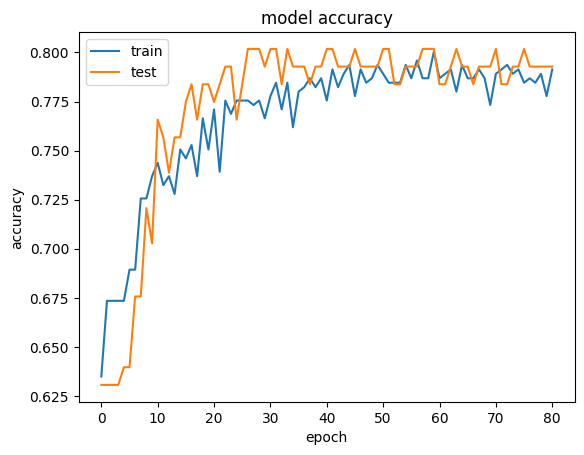

In [481]:
# list all data in history
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

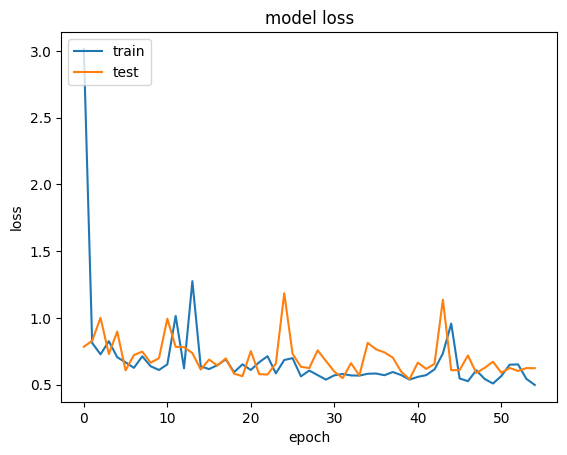

In [482]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [483]:
y_pred = model2.predict(X_test_scaled)
y_pred = y_pred>0.33 # threshold for diabete 
y_pred = y_pred * 1

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
print("Model performance :")
print("Confusion Matrix:\n", cm)
print("Accuracy: ", acc)
print("Precision:", pr)
print("Recall:", rc)

5/5 [==============================] - 0s 1ms/step
Model performance :
Confusion Matrix:
 [[65 27]
 [ 5 41]]
Accuracy:  0.7681159420289855
Precision: 0.6029411764705882
Recall: 0.8913043478260869


That model with scaled data performed better than the other one 👍

# Conclusion 🧙

We obtained good results on the Logistic Regression model and on the Deep Learning model with scaled data. 
The performances could be increased by having more data.
I believe that the best model to use would be the Logistic Regression because it's easier to explain 💫

Thanks for reading 🤗